In [16]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Input

In [17]:
# Load top 10,000 most frequent words
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to have equal length
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [18]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=num_words, output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=512,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5744 - loss: 0.6884 - val_accuracy: 0.6733 - val_loss: 0.6544
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7370 - loss: 0.6180 - val_accuracy: 0.7826 - val_loss: 0.5086
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8287 - loss: 0.4572 - val_accuracy: 0.8428 - val_loss: 0.3897
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8562 - loss: 0.3605 - val_accuracy: 0.8602 - val_loss: 0.3408
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8801 - loss: 0.3059 - val_accuracy: 0.8687 - val_loss: 0.3179
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8934 - loss: 0.2741 - val_accuracy: 0.8680 - val_loss: 0.3065
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9032 - loss: 0.2507 - val_accuracy: 0.8746 - val_loss: 0.2985
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9122 - loss: 0.2291 - val_accuracy: 0.8791 - v

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.2881
Test Accuracy: 0.88


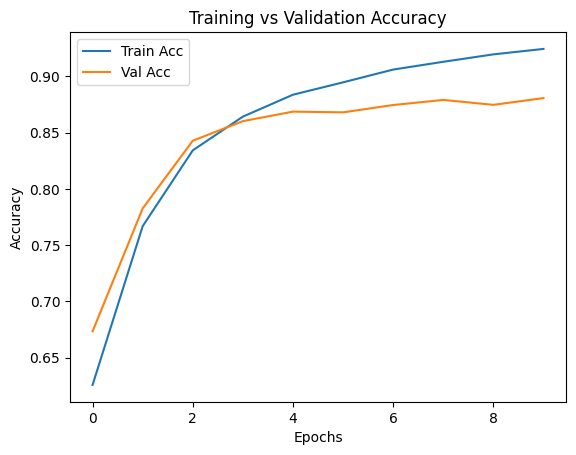

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [21]:
# Make predictions on the test data
pred_probs = model.predict(X_test)

# Convert probabilities to binary class output (0 or 1)
predictions = (pred_probs > 0.5).astype("int32")

# Print first 10 predictions and actual labels for comparison
for i in range(10):
    print(f"Review {i + 1}: Predicted = {predictions[i][0]}, Actual = {y_test[i]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Review 1: Predicted = 0, Actual = 0
Review 2: Predicted = 1, Actual = 1
Review 3: Predicted = 1, Actual = 1
Review 4: Predicted = 0, Actual = 0
Review 5: Predicted = 1, Actual = 1
Review 6: Predicted = 1, Actual = 1
Review 7: Predicted = 1, Actual = 1
Review 8: Predicted = 0, Actual = 0
Review 9: Predicted = 1, Actual = 0
Review 10: Predicted = 1, Actual = 1


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

Precision: 0.87
Recall: 0.89
F1-Score: 0.88
Confusion Matrix:
[[10862  1638]
 [ 1344 11156]]
